# Inteligência Artificial Aplicada a Automação
## AP1 - Aprendizado Supervisionado de Máquina - Problema de Regressão
### Professor: Tiago Ramos de Sá - (tsa@uea.edu.br)
### Aluno: André de Oliveira Sacramento - (ados.eai21@uea.edu.br)
### Curso: Engenharia de Controle e Automação 

## 1. Descrição do Problema

A eficiência energética é um dos pilares da sustentabilidade e da automação moderna. A capacidade de prever o consumo de energia em uma residência permite o desenvolvimento de sistemas de gerenciamento inteligentes como as Smart Grids e Smart Homes, que podem otimizar o uso de recursos, reduzir custos para o consumidor e diminuir o impacto ambiental.

Esta atividade prática foca no desenvolvimento de um modelo de aprendizado de máquina para resolver um problema de regressão: prever o consumo de energia de eletrodomésticos em Wh com base em um conjunto de variáveis ambientais, como temperatura e umidade, coletadas dentro e fora de uma residência.

O objetivo é criar um modelo preciso e confiável que possa ser a base para um sistema de automação, capaz de, por exemplo, acionar aparelhos em horários de menor demanda ou custo, ou alertar sobre consumos anormais. O dataset utilizado para este fim foi o 'Appliances Energy Prediction' do Kaggle, que contém medições de sensores a cada 10 minutos.

## Dase de dados

Disponível em: https://www.kaggle.com/datasets/loveall/appliances-energy-prediction

## Bibliotecas 

Iniciamos com a importação das bibliotecas que serão utilizadas para o desenvolvimento do modelo 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## 2. Análise Exploratória dos Dados (EDA)

Após a importação das bibliotecas que serão utilizadas podemos entender a estrutura, as características, as distribuições e as relações presentes no nossos dados.

In [2]:
#melhorando a visualização 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv('KAG_energydata_complete.csv')


print("Dimensões do dataset:")
print(df.shape)

print("\nInformações gerais sobre as colunas:")
df.info()

print("\nVisualização das primeiras linhas:")
print(df.head())

print("\nResumo estatístico das variáveis numéricas:")
print(df.describe())






Dimensões do dataset:
(19735, 29)

Informações gerais sobre as colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           197

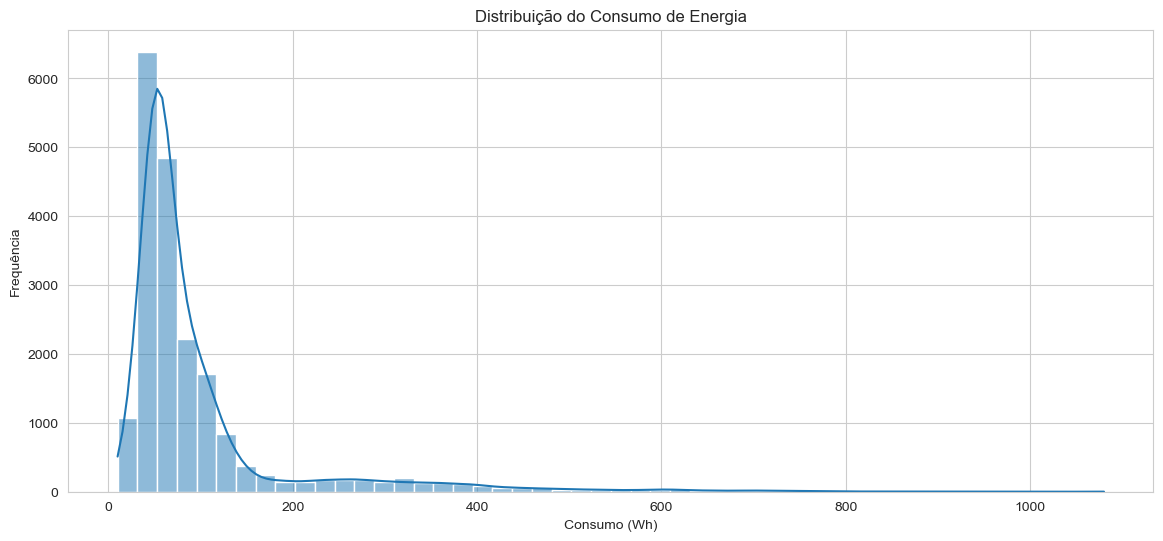

In [3]:
#histograma do consumo x frequencia foco no appliance
plt.figure(figsize=(14, 6))
sns.histplot(df['Appliances'], kde=True, bins=50)
plt.title('Distribuição do Consumo de Energia')
plt.xlabel('Consumo (Wh)')
plt.ylabel('Frequência')
plt.show()

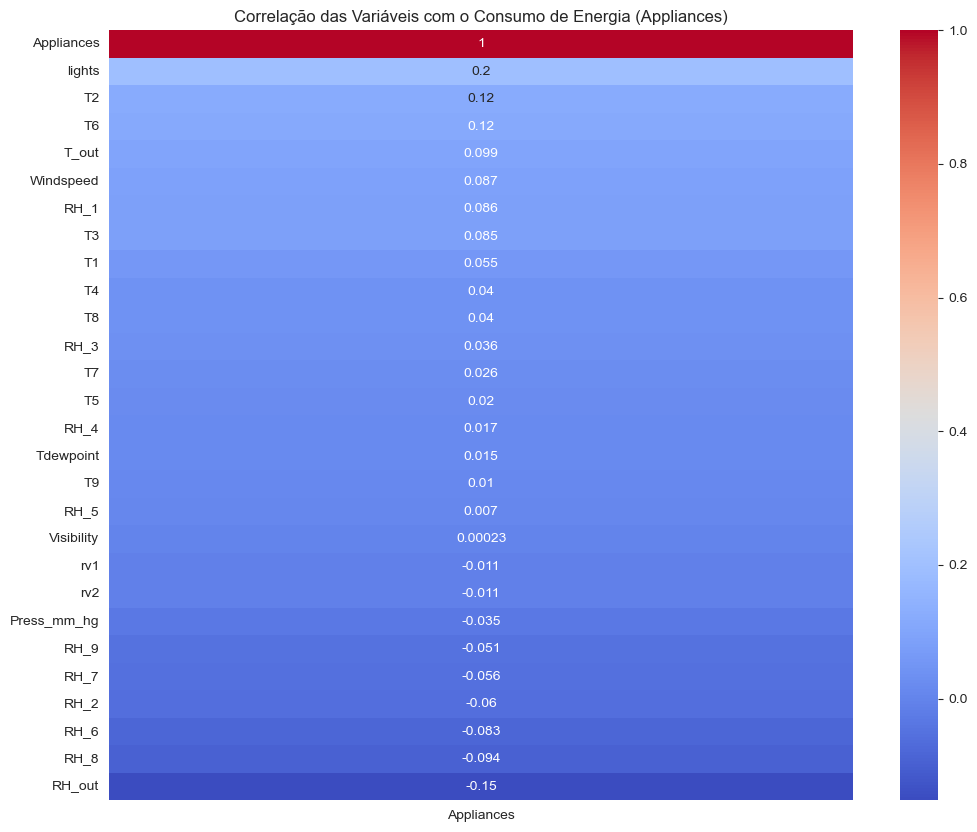

In [4]:
#heatmap de correlação
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr(numeric_only=True) #ignora a conluna de string e considerar apenas valores numericos
sns.heatmap(correlation_matrix[['Appliances']].sort_values(by='Appliances', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlação das Variáveis com o Consumo de Energia (Appliances)')
plt.show()

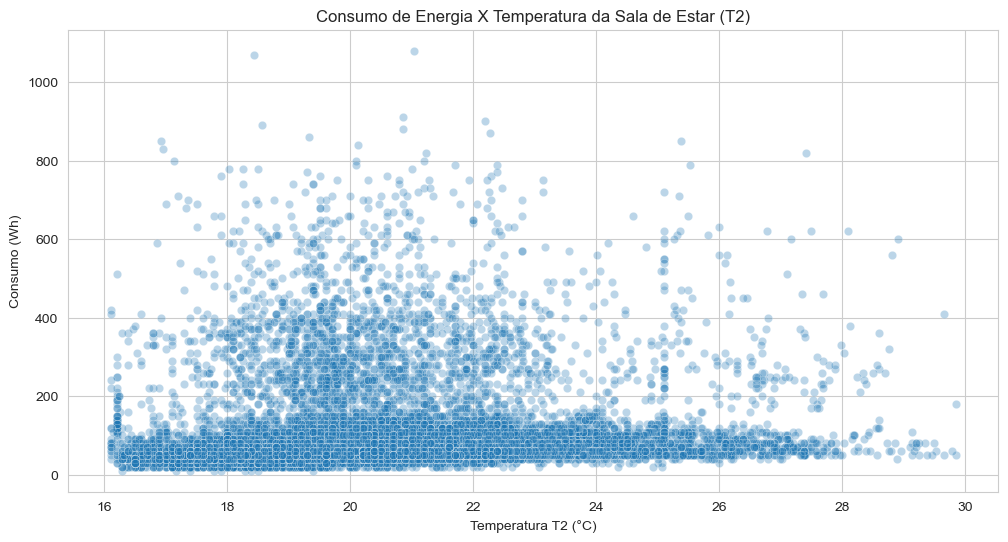

In [5]:
#dispersão entre a temperatura da sala (T2) e o consumo
sns.scatterplot(x='T2', y='Appliances', data=df, alpha=0.3)
plt.title('Consumo de Energia X Temperatura da Sala de Estar (T2)')
plt.xlabel('Temperatura T2 (°C)')
plt.ylabel('Consumo (Wh)')
plt.show()


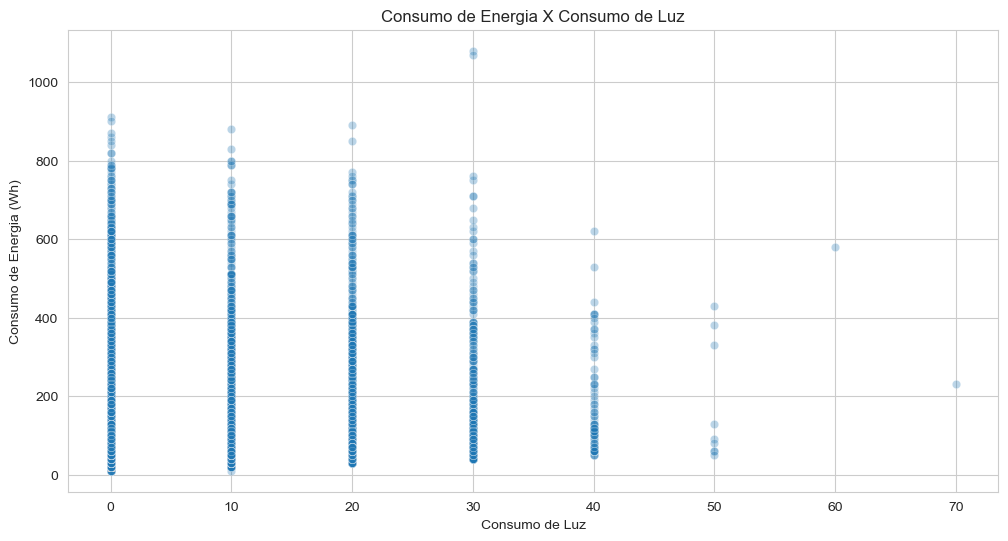

In [6]:
#dispersão entre a luz e o consumo
sns.scatterplot(x='lights', y='Appliances', data=df, alpha=0.3)
plt.title('Consumo de Energia X Consumo de Luz')
plt.xlabel('Consumo de Luz')
plt.ylabel('Consumo de Energia (Wh)')
plt.show()

## 3. Pré-processamento dos Dados

Vamos limpar e preparar os dados para que possam ser utilizados pelos modelos de machine learning

In [7]:
print("valores nulos:")
print(df.isnull().sum().sum())

#organização do dataset
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek # Segunda=0, Domingo=6
df['month'] = df['date'].dt.month

#remove a conluna date
df_processed = df.drop('date', axis=1)

print("\nVisualização do dataset - Organizado:")
print(df_processed.head())

#separação das Features (X) e Alvo (y)
X = df_processed.drop('Appliances', axis=1)
y = df_processed['Appliances']

#divisão dados em conjuntos de treino e teste
from sklearn.model_selection import train_test_split

#80% dos dados para treino e 20% para teste
#Com o random_state a divisão é a mesma em todas as execuções.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nFormato dos dados de treino: {X_train.shape}")
print(f"Formato dos dados de teste: {X_test.shape}")

valores nulos:
0

Visualização do dataset - Organizado:
   Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0          60      30  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1          60      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2          50      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3          50      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4          60      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...  Press_mm_hg  RH_out  Windspeed  Visibility  \
0  19.000000  45.566667  ...        733.5    92.0   7.000000   63.000000   
1  19.000000  45.992500  ...        733.6    92.0   6.666667   59.166667   
2  18.926667  45.890000  ...        733.7    92.0   6.333333   55.333333   
3  18.890000  45.723333  ...        733.8    92.0   6.000000   51.500000   
4  18.890000  45.530000  ...        733.9    92.0   5.666667   47.666667   

   Tdewpoint      

## 4. Modelagem

Vamos realizar o treinamento dos modelos de regressão com os dados preparados.

Serão utilizados três modelos para teste: Random Forest, XGBoost Regressor e K-Nearest Neighbors (KNN) Regressor

In [9]:
#importação dos modelos
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

#treinando o primeiro modelo: Random Forest Regressor com parametros padrão 
rf_model = RandomForestRegressor(n_estimators=50, random_state=10, n_jobs=-1) 
print("Treinando o modelo Random Forest...")
rf_model.fit(X_train, y_train)
print("Treinamento concluído.")

#treinando o segundo modelo: XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
print("\nTreinando o modelo XGBoost...")
xgb_model.fit(X_train, y_train)
print("Treinamento concluído.")

#treinando o terceiro modelo: K-Nearest Neighbors (KNN) Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
print("\nTreinando o modelo KNN...")
knn_model.fit(X_train, y_train)
print("Treinamento concluído.")

#importando o GridSearchCV para Hiperparâmetros
from sklearn.model_selection import GridSearchCV

#definição da grade de parâmetros para testar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features':['sqrt', 'log2']
}

#configuração do GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error', 
                           verbose=2) 

print("\nIniciando a otimização de hiperparâmetros com GridSearchCV...")
grid_search.fit(X_train, y_train)

print("\nMelhores parâmetros encontrados:")
print(grid_search.best_params_)

#modelo já treinado dentro do grid_search.best_estimator_
best_rf_model = grid_search.best_estimator_

Treinando o modelo Random Forest...
Treinamento concluído.

Treinando o modelo XGBoost...
Treinamento concluído.

Treinando o modelo KNN...
Treinamento concluído.

Iniciando a otimização de hiperparâmetros com GridSearchCV...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max

## 5. Avaliação dos Modelos 

E finalmente podemos medir a performance dos modelos treinados usando métricas de regressão e comparar seus resultados.

--- Resultados para o modelo: Random Forest (Padrão) ---
MAE (Erro Médio Absoluto): 32.44 Wh
RMSE (Raiz do Erro Quadrático Médio): 68.43 Wh
R² (Coeficiente de Determinação): 0.5320
----------------------------------------
--- Resultados para o modelo: XGBoost (Padrão) ---
MAE (Erro Médio Absoluto): 35.48 Wh
RMSE (Raiz do Erro Quadrático Médio): 69.72 Wh
R² (Coeficiente de Determinação): 0.5143
----------------------------------------
--- Resultados para o modelo: KNN (Padrão) ---
MAE (Erro Médio Absoluto): 45.47 Wh
RMSE (Raiz do Erro Quadrático Médio): 88.43 Wh
R² (Coeficiente de Determinação): 0.2185
----------------------------------------
--- Resultados para o modelo: Random Forest (Otimizado) ---
MAE (Erro Médio Absoluto): 30.23 Wh
RMSE (Raiz do Erro Quadrático Médio): 63.70 Wh
R² (Coeficiente de Determinação): 0.5945
----------------------------------------

Tabela Comparativa de Resultados:
                      Modelo        MAE       RMSE        R²
3  Random Forest (Otimizado) 

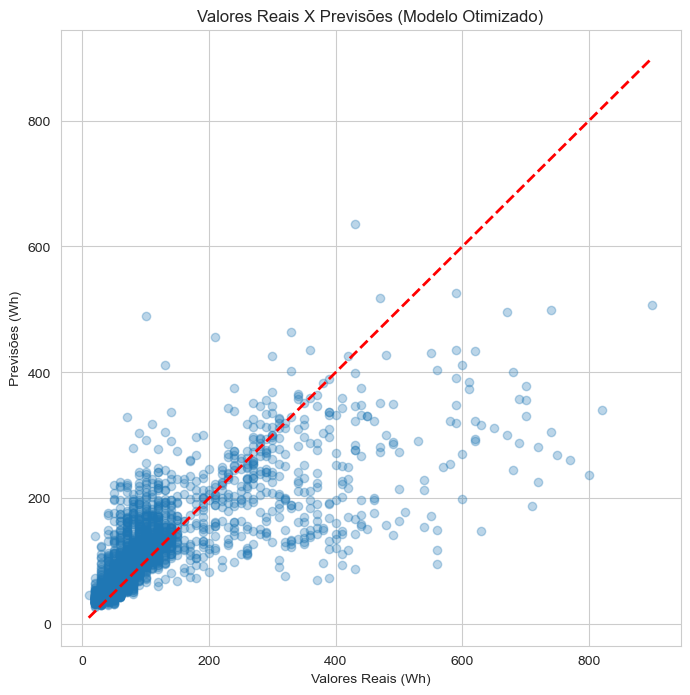

In [10]:
#importando as métricas para avaliação
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#previsões com os dados de teste
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_best_rf = best_rf_model.predict(X_test) # Previsões do modelo otimizado

#calculo das métricas para cada modelo
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"--- Resultados para o modelo: {model_name} ---")
    print(f"MAE (Erro Médio Absoluto): {mae:.2f} Wh")
    print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f} Wh")
    print(f"R² (Coeficiente de Determinação): {r2:.4f}")
    print("-" * 40)
    return [model_name, mae, rmse, r2]

#avaliação e armazenar dos resultados
results = []
results.append(evaluate_model(y_test, y_pred_rf, 'Random Forest (Padrão)'))
results.append(evaluate_model(y_test, y_pred_xgb, 'XGBoost (Padrão)'))
results.append(evaluate_model(y_test, y_pred_knn, 'KNN (Padrão)'))
results.append(evaluate_model(y_test, y_pred_best_rf, 'Random Forest (Otimizado)'))

#criação de um dataframe para comparar os resultados
results_df = pd.DataFrame(results, columns=['Modelo', 'MAE', 'RMSE', 'R²'])
print("\nTabela Comparativa de Resultados:")
print(results_df.sort_values(by='R²', ascending=False))

#visualização dos resultados: gráfico de previsões X valores Reais
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_best_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Valores Reais X Previsões (Modelo Otimizado)')
plt.xlabel('Valores Reais (Wh)')
plt.ylabel('Previsões (Wh)')
plt.show()

## 5. Conclusão 

Podemos concluir que a arquitetura Random Forest foi a mais adequada para este conjunto de dados. O modelo Random Forest (Otimizado), após um processo de busca em grade com GridSearchCV, alcançou assim uma performance superior em todas as métricas de avaliação, obtendo um Coeficiente de Determinação (R^2) de 0.5945 e um Erro Médio Absoluto (MAE) de 30.23 Wh. Isso indica que o modelo final é capaz de explicar aproximadamente 59,5% da variabilidade no consumo de energia, com um erro médio de previsão de cerca de 30 Wh.